# Santa Clara County Airbnb Investigation

## Table of Contents

- <a href='#business'>Business Understanding</a>
- <a href='#data'>Data Understanding</a>
- <a href='#prepare'>Prepare Data</a>
- <a href='#analysis'>Data Analysis & Modeling</a>
- <a href='#results'>Results</a>
- <a href='#deploy'>Deploy</a>
- <a href='#sources'>Sources</a>

<a id='business'></a>
## Business Understanding

[Airbnb](https://www.airbnb.com), founded in 2008, is an online platform that allows property owners to market short-term rentals to guests. The company's original intention was to follow a sharing economy model in which hosts would only occasionally rent out their spaces. However, there have been concerns in recent years that owners are listing their properties permanently, more like hotels, which is against the law in many locations and could lead to a number of downstream consequences such as gentrification and lack of affordable housing. Airbnbs that operate like hotels are also able to avoid certain taxes and regulations that other regular hotels must endure.

I was curious to see the effects of Airbnb in Santa Clara County, which is where I live. As a result, I have downloaded data from [Inside Airbnb](http://insideairbnb.com/index.html) on all listings within the county. In the following analysis, I will answer the following questions:

- How often are Airbnb listings occupied?
- Do Airbnbs generate more income per month than long-term rentals?
- What percentage of listings have a host that lives in a different city than the listing location?
- How many listings do hosts tend to have?
- What features best predict how many listings a host has?

<a id='data'></a>
## Data Understanding

I will begin by importing the necessary packages and reading in the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
listings = pd.read_csv('listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11464,https://www.airbnb.com/rooms/11464,20201025134943,2020-10-25,Deluxe Studio 5 min. to SC Kaiser & Apple Park,Custom built Studio with exquisite design. Rea...,10 min. to Lucky's and Starbucks at El Camino ...,https://a0.muscache.com/pictures/121321/2c5a5a...,42458,https://www.airbnb.com/users/show/42458,Emey,2009-09-30,"Mountain View, California, United States",I pride myself on attention to details and cus...,within an hour,100%,91%,f,https://a0.muscache.com/im/users/42458/profile...,https://a0.muscache.com/im/users/42458/profile...,Santa Clara,15,15,"['email', 'phone', 'reviews']",t,f,"Santa Clara, California, United States",Santa Clara,NaN,37.34342,-121.98829,Entire apartment,Entire home/apt,1,NaN,1 bath,NaN,0.0,"[""Pool"", ""Fire extinguisher"", ""Hair dryer"", ""B...",$75.00,14,365,14.0,14.0,365.0,365.0,14.0,365.0,NaN,t,3,33,63,153,2020-10-25,6,0,0,2014-06-15,2019-10-11,87.0,10.0,10.0,10.0,9.0,9.0,9.0,NaN,t,14,14,0,0,0.08
1,21373,https://www.airbnb.com/rooms/21373,20201025134943,2020-10-25,Bonsai Garden Inn in Professorville,Room in gracious home with beautiful garden. ...,This room is in an ultra convenient location i...,https://a0.muscache.com/pictures/527285/0f9d08...,7054,https://www.airbnb.com/users/show/7054,Mei Lin,2009-01-24,"Palo Alto, California, United States","I have lived and worked in Asia, Europe, Austr...",NaN,NaN,97%,t,https://a0.muscache.com/im/users/7054/profile_...,https://a0.muscache.com/im/users/7054/profile_...,Palo Alto,5,5,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Palo Alto, California, United States",Palo Alto,NaN,37.44001,-122.15667,Private room in villa,Private room,1,NaN,2 shared baths,1.0,1.0,"[""Fire extinguisher"", ""Hair dryer"", ""Host gree...",$80.00,2,730,2.0,2.0,730.0,730.0,2.0,730.0,NaN,t,0,0,22,297,2020-10-25,264,17,0,2010-05-28,2020-03-14,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,4,0,4,0,2.08
2,62799,https://www.airbnb.com/rooms/62799,20201025134943,2020-10-25,Zen Office and Sofa in Palo Alto,"Spacious book filled room, standing desk, bed ...","We are in Professorville, the most desirable a...",https://a0.muscache.com/pictures/56831077/4070...,7054,https://www.airbnb.com/users/show/7054,Mei Lin,2009-01-24,"Palo Alto, California, United States","I have lived and worked in Asia, Europe, Austr...",NaN,NaN,97%,t,https://a0.muscache.com/im/users/7054/profile_...,https://a0.muscache.com/im/users/7054/profile_...,Palo Alto,5,5,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Palo Alto, California, United States",Palo Alto,NaN,37.43925,-122.15617,Private room in villa,Private room,2,NaN,2 shared baths,1.0,4.0,"[""Fire extinguisher"", ""Hair dryer"", ""Host gree...",$100

I will check for any duplicate rows and any duplicates in the `id` column in particular, since each listing should only have one row of data.

In [3]:
listings.duplicated().sum()

0

In [4]:
listings.duplicated(subset='id').sum()

0

I will also use `info()` to see the dataframe's shape, each column's data type, and how many missing values each column has.

In [5]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5185 entries, 0 to 5184
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5185 non-null   int64  
 1   listing_url                                   5185 non-null   object 
 2   scrape_id                                     5185 non-null   int64  
 3   last_scraped                                  5185 non-null   object 
 4   name                                          5184 non-null   object 
 5   description                                   5030 non-null   object 
 6   neighborhood_overview                         3218 non-null   object 
 7   picture_url                                   5185 non-null   object 
 8   host_id                                       5185 non-null   int64  
 9   host_url                                      5185 non-null   o

Based on the above information, here are the necessary data wrangling steps:

- Drop the following columns with all missing values: `neighbourhood_group_cleansed`, `bathrooms`, `calendar_updated`, and `license`
- Convert the following columns to the datetime data type: `last_scraped`, `host_since`, `calendar_last_scraped`, `first_review`, and `last_review`
- Convert the following columns to the boolean data type: `host_is_superhost`, `host_has_profile_pic`, `host_identity_verified`,  `has_availability`, and  `instant_bookable`
- Convert the following columns to the float data type: `host_response_rate`, `host_acceptance_rate`, and `price`
- Extract number and type of bathrooms from `bathrooms_text`
- Convert each row in the following columns to lists: `host_verifications` and `amenities`
- Examine columns with missing values to see if any of them need imputed values

<a id='prepare'></a>
## Prepare Data

First I will drop columns that have all missing values, as these will not be useful for my analysis. I will also convert all date-related columns to the datetime data type.

In [6]:
listings.drop(['neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated', 'license'], axis=1, inplace=True)

In [7]:
listings_datetime = ['last_scraped', 'host_since', 'calendar_last_scraped', 'first_review', 'last_review']
for col in listings_datetime:
    listings[col] = pd.to_datetime(listings[col])

When looking at the data in the previous section, I noticed that all true/false columns were marked with the string `t` or `f`, rather than having the boolean data type. I will use a lambda function to convert all `t` to `True` and all `f` to `False`.

In [8]:
listings_bool = [
    'host_is_superhost',
    'host_has_profile_pic',
    'host_identity_verified',
    'has_availability',
    'instant_bookable'
]
for col in listings_bool:
    listings[col] = listings[col].apply(lambda x: True if x=='t' else False)

Now I need to convert a few columns to the float data type. The `price` column currently has strings that contain `$` and sometimes `,` for prices in the thousands. I will create a function to remove these two characters and then convert the values to float.

In [9]:
def convert_currency(currency_string):
    '''
    INPUT:
    currency_string (str) - currency string to convert
    
    OUTPUT
    currency_float (float) - currency as the float data type
    
    Remove ',' and '$', then convert currency in string form into the float data type.
    '''
    
    currency_float = currency_string.replace('$', '').replace(',', '')
    currency_float = pd.to_numeric(currency_float)
    return currency_float

In [10]:
listings['price'] = listings['price'].apply(convert_currency)

The `host_reponse_rate` and `host_acceptance_rate` both have strings contain the character `%`. I will create a function to remove this character, then divide the resulting value by 100 to convert percentages to decimals.

In [11]:
def convert_percentage(percent_string):
    '''
    INPUT:
    percent_string (str) - percentage string to convert
    
    OUTPUT:
    percent_float (float) - percentage as the float data type
    
    Remove '%', convert the percentage in string form into the float data type, and then divide by 100.
    '''
    
    try:
        percent_float = percent_string.replace('%', '')
        percent_float = pd.to_numeric(percent_float)/100.
    except:
        percent_float = np.nan
    return percent_float

In [12]:
listings['host_response_rate'] = listings['host_response_rate'].apply(convert_percentage)
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].apply(convert_percentage)

Now I want to extract the number and type of bathrooms from the `bathrooms_text` column, since I think these two features will be better in the describing a listing's bathroom situation. I will first look at the unique values in the `bathrooms_text` column to see what wrangling I might need to do.

In [13]:
listings['bathrooms_text'].unique()

array(['1 bath', '2 shared baths', '1 private bath', 'Half-bath',
       '1 shared bath', '1.5 baths', '0 baths', '2.5 baths',
       '1.5 shared baths', '0 shared baths', '4.5 baths', '2 baths',
       '3 baths', nan, '3 shared baths', '3.5 baths', '2.5 shared baths',
       '4 baths', 'Shared half-bath', '4 shared baths', '6 baths',
       '5 baths', '6.5 baths', '3.5 shared baths', '8 baths', '5.5 baths'],
      dtype=object)

It looks like most of the values have a number in the description, except for half-baths. I will replace these values with 0.5, and then use regex to extract the number of bathrooms.

In [14]:
# Replace 'half' with 0.5 so that the number can be extracted
listings['bathrooms'] = listings['bathrooms_text'].str.replace(r'[Hhalf]-', '0.5 ')
listings['bathrooms'] = listings['bathrooms'].str.extract(r'(\d\.?\d?)')
listings['bathrooms'] = listings['bathrooms'].astype(float)

I also want a column that describes whether the bathrooms are shared or private. If the description mentions that the bathrooms are shared, then I will classify the bathrooms as so, otherwise I will assume that they are private.

In [15]:
def extract_baths_type(baths_string):
    '''
    INPUT:
    baths_string (str) - full bathroom description
    
    OUTPUT:
    baths_type - type of bathroom, if applicable, either 'Shared' or 'Private'
    
    Extract the bathroom type from descriptive text.
    '''
    
    try:
        if re.search(r'[Ss]hared', baths_string):
            baths_type = 'Shared'
        elif re.search(r'bath', baths_string):
            baths_type = 'Private'
    except:
        baths_type = np.nan
    return baths_type

In [16]:
listings['bathrooms_type'] = listings['bathrooms_text'].apply(extract_baths_type)

The `host_verifications` and `amenities` columns are currently strings but contain lists. I will convert both of these columns so that they contain lists in each row.

In [17]:
listings['host_verifications'] = listings['host_verifications'].apply(eval)
listings['amenities'] = listings['amenities'].apply(eval)

After all of the above wrangling, I will now take a look at the dataframe to see if any more cleaning needs to be done, particularly in regards to missing values.

In [18]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bathrooms,bathrooms_type
0,11464,https://www.airbnb.com/rooms/11464,20201025134943,2020-10-25,Deluxe Studio 5 min. to SC Kaiser & Apple Park,Custom built Studio with exquisite design. Rea...,10 min. to Lucky's and Starbucks at El Camino ...,https://a0.muscache.com/pictures/121321/2c5a5a...,42458,https://www.airbnb.com/users/show/42458,Emey,2009-09-30,"Mountain View, California, United States",I pride myself on attention to details and cus...,within an hour,1.0,0.91,False,https://a0.muscache.com/im/users/42458/profile...,https://a0.muscache.com/im/users/42458/profile...,Santa Clara,15,15,"[email, phone, reviews]",True,False,"Santa Clara, California, United States",Santa Clara,37.34342,-121.98829,Entire apartment,Entire home/apt,1,1 bath,NaN,0.0,"[Pool, Fire extinguisher, Hair dryer, Building...",75.0,14,365,14.0,14.0,365.0,365.0,14.0,365.0,True,3,33,63,153,2020-10-25,6,0,0,2014-06-15,2019-10-11,87.0,10.0,10.0,10.0,9.0,9.0,9.0,True,14,14,0,0,0.08,1.0,Private
1,21373,https://www.airbnb.com/rooms/21373,20201025134943,2020-10-25,Bonsai Garden Inn in Professorville,Room in gracious home with beautiful garden. ...,This room is in an ultra convenient location i...,https://a0.muscache.com/pictures/527285/0f9d08...,7054,https://www.airbnb.com/users/show/7054,Mei Lin,2009-01-24,"Palo Alto, California, United States","I have lived and worked in Asia, Europe, Austr...",NaN,NaN,0.97,True,https://a0.muscache.com/im/users/7054/profile_...,https://a0.muscache.com/im/users/7054/profile_...,Palo Alto,5,5,"[email, phone, reviews, jumio, offline_governm...",True,True,"Palo Alto, California, United States",Palo Alto,37.44001,-122.15667,Private room in villa,Private room,1,2 shared baths,1.0,1.0,"[Fire extinguisher, Hair dryer, Host greets yo...",80.0,2,730,2.0,2.0,730.0,730.0,2.0,730.0,True,0,0,22,297,2020-10-25,264,17,0,2010-05-28,2020-03-14,97.0,10.0,10.0,10.0,10.0,10.0,10.0,False,4,0,4,0,2.08,2.0,Shared
2,62799,https://www.airbnb.com/rooms/62799,20201025134943,2020-10-25,Zen Office and Sofa in Palo Alto,"Spacious book filled room, standing desk, bed ...","We are in Professorville, the most desirable a...",https://a0.muscache.com/pictures/56831077/4070...,7054,https://www.airbnb.com/users/show/7054,Mei Lin,2009-01-24,"Palo Alto, California, United States","I have lived and worked in Asia, Europe, Austr...",NaN,NaN,0.97,True,https://a0.muscache.com/im/users/7054/profile_...,https://a0.muscache.com/im/users/7054/profile_...,Palo Alto,5,5,"[email, phone, reviews, jumio, offline_governm...",True,True,"Palo Alto, California, United States",Palo Alto,37.43925,-122.15617,Private room in villa,Private room,2,2 shared baths,1.0,4.0,"[Fire extinguisher, Hair dryer, Host greets yo...",100.0,7,730,7.0,7.0,1125.0,1125.0,7.0,1125.

In [19]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5185 entries, 0 to 5184
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            5185 non-null   int64         
 1   listing_url                                   5185 non-null   object        
 2   scrape_id                                     5185 non-null   int64         
 3   last_scraped                                  5185 non-null   datetime64[ns]
 4   name                                          5184 non-null   object        
 5   description                                   5030 non-null   object        
 6   neighborhood_overview                         3218 non-null   object        
 7   picture_url                                   5185 non-null   object        
 8   host_id                                       5185 non-null   int64 

In [20]:
# output columns with missing values
listings.columns[listings.isnull().sum()>0]

Index(['name', 'description', 'neighborhood_overview', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_neighbourhood', 'neighbourhood',
       'bathrooms_text', 'bedrooms', 'beds', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'bathrooms',
       'bathrooms_type'],
      dtype='object')

It seems reasonable for these columns to have missing values. Some possible reasons that these columns have missing values is that the host did not want to include all information for the listing, or the listing is new so it has not yet gotten any inquires, bookings, or reviews. I do not want to impute any values for now, since the imputed values may not be accurate. I will impute values later if necessary.

<a id='analysis'></a>
## Data Analysis & Modeling

### How often are Airbnb listings occupied?

If a listing has a high occupancy rate, it is an indication that the listing is possibly not operating under Airbnb's original intentions, leading to other downstream consequences as mentioned previously. In order to calculate the occupancy rate, I will use Inside Airbnb's "San Francisco Model", which is described [here](http://insideairbnb.com/about.html). Essentially, this model assumes a review rate of 50%, meaning that bookings get reviewed 50% of the time. Unless there is other data on the average nights per booking for a location, the model then assumes 3 nights per booking, unless a listing has a higher number of minimum nights required. In the case of [Santa Clara County](http://insideairbnb.com/santa-clara-county/?neighbourhood=&filterEntireHomes=false&filterHighlyAvailable=false&filterRecentReviews=false&filterMultiListings=false), there is no other data, so the model uses 3 nights per booking. Finally, the model caps the maximum occupancy at 70% to make sure that the model is reasonable but conservative.

I will follow the same methodology and create a function to find the occupancy rate for each listing.

In [21]:
listings_occ = listings.copy()

In [22]:
def run_sf_model(reviews_per_month, minimum_nights):
    '''
    INPUT:
    reviews_per_month (Series) - number of reviews per months that listings receive
    minimum_nights (Series) - minimum number of nights required for listings to be booked
    
    OUTPUT:
    nights_per_year (Series) - estimated number of nights per year that a listing is booked
    
    Estimate the number of nights per year that a listing is booked based on Inside Airbnb's San Francisco Model.
    '''
    
    # assume that listings have a review rate of 50%, meaning the number of reviews is 50% of the number of bookings
    est_bookings_per_month = reviews_per_month*2
    # assume 3 nights per booking, unless the listing has a higher minimum nights
    nights_per_booking = minimum_nights.apply(lambda nights: max(nights, 3))
    nights_per_month = est_bookings_per_month*nights_per_booking
    # assume that the occupancy rate is capped at 70%
    nights_per_year = nights_per_month.apply(lambda nights: min(nights*12, 0.7*365))
    return nights_per_year

In [23]:
listings_occ['nights_per_year'] = run_sf_model(listings_occ['reviews_per_month'], listings_occ['minimum_nights'])

Now that I have the `nights_per_year` booked for the listings, I can find the occupancy rate by finding the percentage of nights in a year that listings are booked. I can also find the average income per month for listings by multiplying the `nights_per_year` booked by the `price` to get the total annual income, and then divide that by 12 months.

In [24]:
listings_occ['occupancy'] = listings_occ['nights_per_year']/365
listings_occ['income_per_month'] = listings_occ['nights_per_year']*listings_occ['price']/12

Now that I have the `occupancy` column, I will look at the distribution to help answer my question.

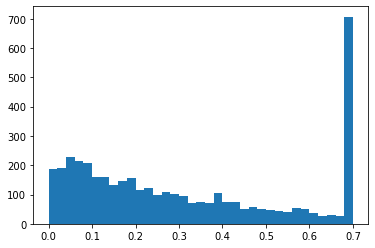

In [25]:
bin_size = 0.02
bins = np.arange(0, 0.7+bin_size, bin_size)
plt.hist(data=listings_occ, x='occupancy', bins=bins);

Interestingly, the distribution of `occupancy` hits a peak around 5% and then gradually decreases until it reaches about 70%, at which point there is a large spike. This is likely due to `occupancy` being capped at 70%, so a lot of listings which might have had a high number of `reviews_per_month` or `minimum_nights`, and consequently higher occupancy, were all adjusted down.

I will take a quick look at the proportion of operating listings that are at 70% occupancy.

In [26]:
listings_occ.query('occupancy == 0.7').shape[0]/listings_occ[listings_occ['occupancy'].notnull()].shape[0]

0.16508631169462679

Now I want to look at the `occupancy` by the `neighbourhood_cleansed`. Before I do that though, I also will look at the count of each `neighbourhood_cleansed` to get a better idea of the data.

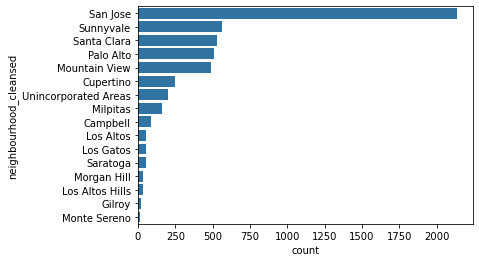

In [27]:
base_color = sb.color_palette()[0]
# order the categories by highest to lowest value counts
neighbourhood_order = listings_occ['neighbourhood_cleansed'].value_counts().index
ordered_neighbourhood = pd.api.types.CategoricalDtype(categories=neighbourhood_order, ordered=True)
listings_occ['neighbourhood_cleansed'] = listings_occ['neighbourhood_cleansed'].astype(ordered_neighbourhood)
sb.countplot(data=listings_occ, y='neighbourhood_cleansed', color=base_color);

San Jose has the most listings by far, followed by Sunnyvale, Santa Clara, Palo Alto, and Mountain View. After that, the number of listings per neighborhood drops lower, to about 250 or less for each.

Now I can look at `occupancy` by `neighbourhood_cleansed`, and I will do this using box plots.

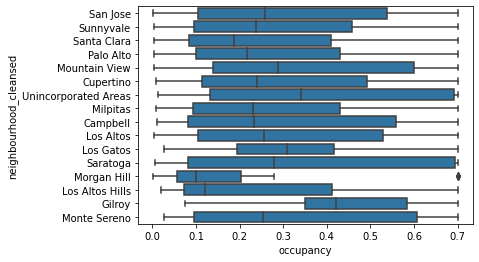

In [28]:
sb.boxplot(data=listings_occ, x='occupancy', y='neighbourhood_cleansed', color=base_color);

I cannot draw any definite conclusions from this visualization. Unincorporated Areas, Los Gatos, Saratoga, and Gilroy all seem to have higher `occupancy`, while Morgan Hill stands out on the low end. However, all of these neighborhoods also have low numbers of listings, which means they could be more heavily influenced by outliers.

Now I will look at the occupancy rate by `room_type`. Again, I will look at the counts for the variable to understand the data first.

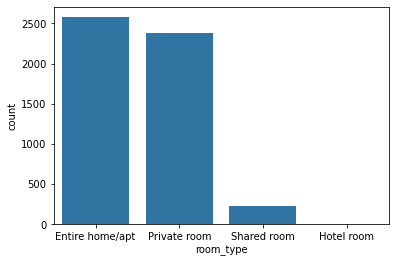

In [29]:
room_order = listings_occ['room_type'].value_counts().index
ordered_room = pd.api.types.CategoricalDtype(categories=room_order, ordered=True)
listings_occ['room_type'] = listings_occ['room_type'].astype(ordered_room)
sb.countplot(data=listings_occ, x='room_type', color=base_color);

In [30]:
listings_occ['room_type'].value_counts()

Entire home/apt    2576
Private room       2382
Shared room         225
Hotel room            2
Name: room_type, dtype: int64

There are much fewer counts of shared rooms compared to the two largest types. I will also remove the two rows with `Hotel room`, since these will not be useful.

After removing the rows, I can show the distribution of `occupancy` by `room_type` using faceted histograms. I will normalize the histograms and make the `room_type` easier to compare by showing the percentage of the counts in each bin.

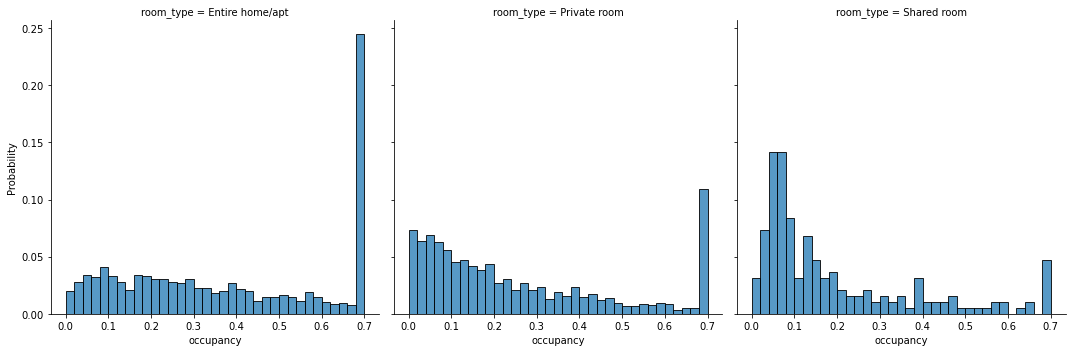

In [31]:
listings_occ_mod = listings_occ.query('room_type != "Hotel room"')
# make sure 'Hotel room' is removed
listings_occ_mod['room_type'].cat.remove_unused_categories(inplace=True)
bin_size = 0.02
bins = np.arange(0, 0.7+bin_size, bin_size)
sb.displot(data=listings_occ_mod, x='occupancy', col='room_type', bins=bins, stat='probability', common_norm=False);

This visualization shows a clear difference between the three different types of rooms. Entire homes and apartments tend to have a high proportion of listings hitting the limit on `occupancy`. Private rooms, in comparison, have lower `occupancy`, with a higher proportion towards the left side of the distribution, but still a noticeable peak at the maximum. Shared rooms clearly have the lowest `occupancy`, with the highest proportion on the left side of the distribution and only a slight peak at the maximum.

### Do Airbnbs generate more income per month than long-term rentals?

Now I want to find out how much income per month Airbnbs generate. If this amount is more than the income per month for a long-term rental, this means that hosts may be more incentivized to put their listings on Airbnb rather than on the rental market, which could lead to housing shortages.

First I will look at the distribution of `income_per_month` to understand the data.

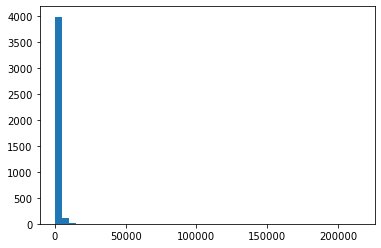

In [32]:
bin_size = 5000
bins = np.arange(0, listings_occ['income_per_month'].max()+bin_size, bin_size)
plt.hist(data=listings_occ, x='income_per_month', bins=bins);

The distribution is very right-skewed, so I will plot the histogram using a logarithmic scale.

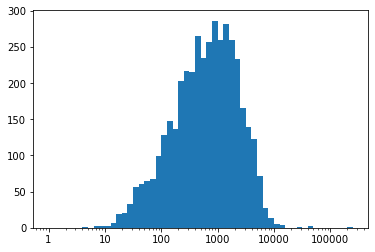

In [33]:
log_bin_size = 0.1
tick_labels = [1, 10, 100, 1000, 10000, 100000]
bins = 10**np.arange(0, np.log10(listings_occ['income_per_month'].max())+log_bin_size, log_bin_size)
plt.hist(data=listings_occ, x='income_per_month', bins=bins)
plt.xscale('log')
plt.xticks(tick_labels, tick_labels);

Using this histogram, it appears that the peak occurs around $1,000 per month. It should also be noted that there are several outliers.

Now I want to look at the `income_per_month` by `room_type`, since entire properties will obviously have more space than shared or private rooms, and therefore generate more income. Since `income_per_month` has outliers, I will show the median for each `room_type`.

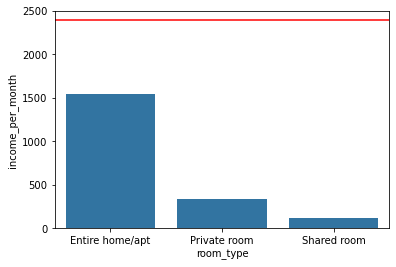

In [34]:
# plot median monthly rent in Santa Clara County as reference line
median_rent = 2392
sb.barplot(data=listings_occ_mod, x='room_type', y='income_per_month', estimator=np.median, color=base_color, ci=None)
plt.ylim(0, 2500)
plt.axhline(y=median_rent, color='r');

The red line is the median monthly rent for a home in Santa Clara County, so it is clear that when looking at all listings, Airbnbs seem to generate less income than long-term rentals. However, not all listings will have a high enough occupancy rate to generate much income, so now I want to see if frequently-booked listings can match the median long-term rent. Inside Airbnb defines "frequently-booked" as listings that are booked more than 60 nights per year.

I will also take a quick look at the counts by `room_type` beforehand to understand the data.

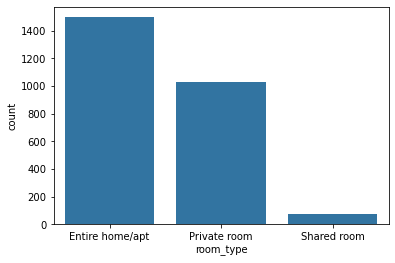

In [35]:
listings_occ_high = listings_occ_mod.query('nights_per_year > 60')
sb.countplot(data=listings_occ_high, x='room_type', color=base_color);

A very low amount of shared rooms are frequently booked compared to entire homes/apartments and private rooms.

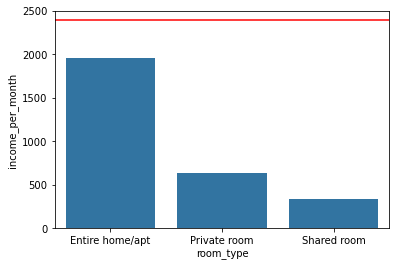

In [36]:
sb.barplot(
    data=listings_occ_high,
    x='room_type',
    y='income_per_month',
    estimator=np.median,
    color=base_color,
    ci=None
)
plt.ylim(0, 2500)
plt.axhline(y=median_rent, color='r');

The median for frequently booked listings still does not match the median long-term rent. I am curious to see at which point the medians will be equal, so I will raise the filter to a third of the year, or around 120 nights.

Again, I will take a look at the counts beforehand.

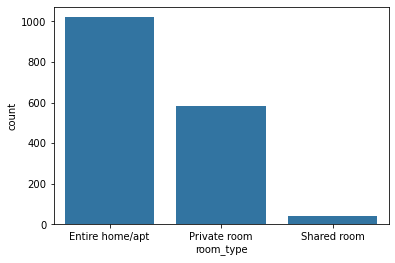

In [37]:
listings_occ_higher = listings_occ_mod.query('nights_per_year > 365/3')
sb.countplot(data=listings_occ_higher, x='room_type', color=base_color);

Again, there is a very low amount of shared rooms with more than a third of the `nights_per_year` booked.

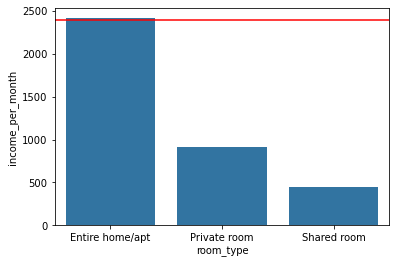

In [38]:
listings_occ_higher = listings_occ_mod.query('nights_per_year > 365/3')
sb.barplot(
    data=listings_occ_higher,
    x='room_type',
    y='income_per_month',
    estimator=np.median,
    color=base_color,
    ci=None
)
plt.axhline(y=median_rent, color='r');

When looking at listings that are booked for more than a third of the year, the median of the entire homes/apartments is just about equal to the median long-term rent for an entire property in Santa Clara County. Having searched for places to rent in the county, I can also confirm that the approximate $1,000 median for a private room is reasonably equivalent to the long-term rent for a room.

But after seeing this, I am wondering, how feasible is it for a listing to be rented out for a third of the year? I will answer this by looking at the percentage of operating Airbnbs that are able to do so.

In [39]:
listings_occ_higher.shape[0]/listings_occ_mod[listings_occ_mod['nights_per_year'].notnull()].shape[0]

0.40029182879377434

If 40% of the listings can be rented out for a third of the year, that means it probably is not too difficult. Plus, that leaves two-thirds of the rest of the year for the property to be used for other purposes, if the host desires. This shows that the Airbnb system may provide some incentives for property owners to list on Airbnb rather than the rental market.

Obviously, some neighborhoods are more expensive than others. Therefore, I will look at the median `income_per_month` by `neighbourhood_cleansed` for listings that fall in the `Entire home/apt` category. I will need to filter the `listings_occ` dataframe first, and then take a look at the counts by `neighbourhood_cleansed`.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


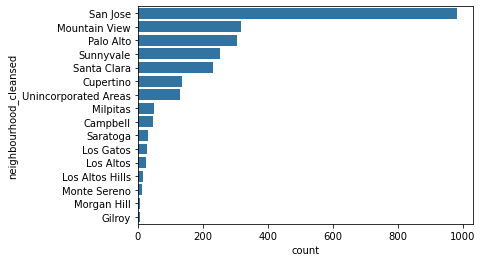

In [40]:
listings_occ_entire = listings_occ.query('room_type == "Entire home/apt"')
listings_occ_entire['neighbourhood_cleansed'] = listings_occ_entire['neighbourhood_cleansed'].astype(str)
neighbourhood_order = listings_occ_entire['neighbourhood_cleansed'].value_counts().index
ordered_neighbourhood = pd.api.types.CategoricalDtype(categories=neighbourhood_order, ordered=True)
listings_occ_entire['neighbourhood_cleansed'] = \
    listings_occ_entire['neighbourhood_cleansed'].astype(ordered_neighbourhood)
sb.countplot(data=listings_occ_entire, y='neighbourhood_cleansed', color=base_color);

This follows a similar trend to all listings -- San Jose has, by far, the most entire homes/apartments, followed by Mountain View, Palo Alto, Sunnyvale, Santa Clara, Cupertino, and Unincorporated Areas. The rest of the neighborhoods after that have low counts.

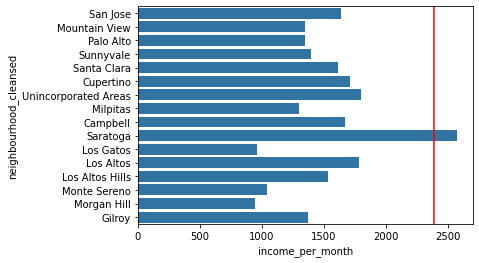

In [41]:
sb.barplot(
    data=listings_occ_entire,
    x='income_per_month',
    y='neighbourhood_cleansed',
    estimator=np.median,
    color=base_color,
    ci=None
)
plt.axvline(x=median_rent, color='r');

When looking at all homes/apartments, only Saratoga has a median `income_per_month` that is higher than the median long-term rent.

Now I am curious to see what this looks like only for homes/apartments that reach the one-third threshold that I mentioned earlier.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


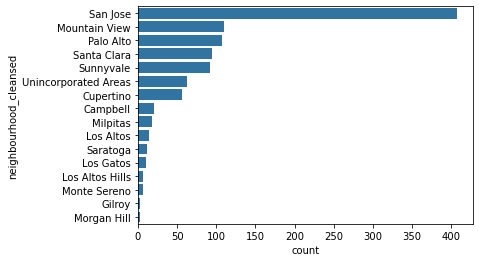

In [42]:
listings_occ_entire_high = listings_occ_entire.query('nights_per_year > 365/3')
listings_occ_entire_high['neighbourhood_cleansed'] = listings_occ_entire_high['neighbourhood_cleansed'].astype(str)
neighbourhood_order = listings_occ_entire_high['neighbourhood_cleansed'].value_counts().index
ordered_neighbourhood = pd.api.types.CategoricalDtype(categories=neighbourhood_order, ordered=True)
listings_occ_entire_high['neighbourhood_cleansed'] = \
    listings_occ_entire_high['neighbourhood_cleansed'].astype(ordered_neighbourhood)
sb.countplot(data=listings_occ_entire_high, y='neighbourhood_cleansed', color=base_color);

The same trend exists for counts of homes/apartments that reach the one-third year threshold.

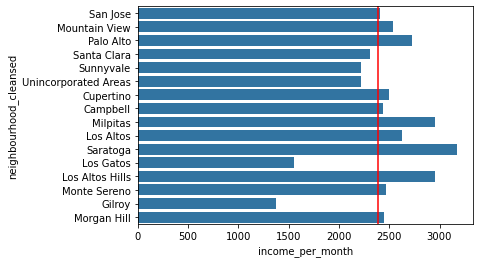

In [43]:
sb.barplot(
    data=listings_occ_entire_high,
    x='income_per_month',
    y='neighbourhood_cleansed',
    estimator=np.median,
    color=base_color,
    ci=None
)
plt.axvline(x=median_rent, color='r');

Homes/apartments in most neighborhoods have an equal or higher median `income_per_month` compared to the median long-term rent. Only Santa Clara, Sunnyvale, Unincorporated Areas, Los Gatos, and Gilroy are lower, but the first three are close.

I also want to look at the median `income_per_month` by the number of people that a home/apartment `accommodates`, since larger listings that accommodate more people will clearly generate more income.

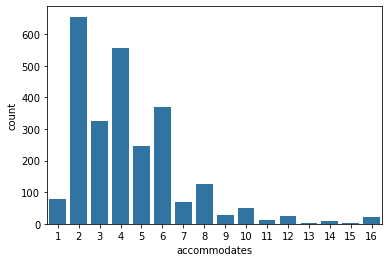

In [44]:
sb.countplot(data=listings_occ_entire, x='accommodates', color=base_color);

It looks like a high number of homes/apartments accommodate between 2-6 people. Interestingly, the counts of even-numbered accommodations appear to be higher than those for odd numbers.

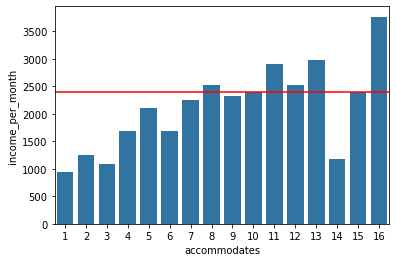

In [45]:
sb.barplot(
    data=listings_occ_entire,
    x='accommodates',
    y='income_per_month',
    estimator=np.median,
    color=base_color,
    ci=None
);
plt.axhline(y=median_rent, color='r');

When looking at all homes/apartments, most places that accommodate 8 or more people are able to reach the equivalent of long-term median rent.

Again, I want to see this same visualization, but for homes/apartments that meet the one-third year threshold.

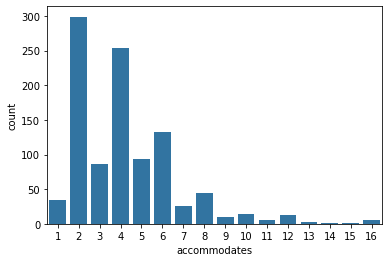

In [46]:
sb.countplot(data=listings_occ_entire_high, x='accommodates', color=base_color);

This follows the same trend as before, with more homes/apartments accommodating between 2-6 people.

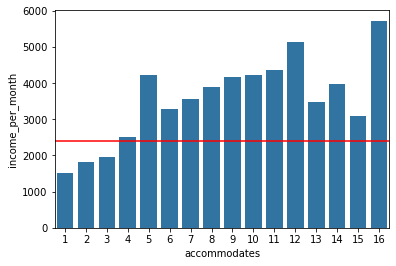

In [47]:
sb.barplot(
    data=listings_occ_entire_high,
    x='accommodates',
    y='income_per_month',
    estimator=np.median,
    color=base_color,
    ci=None
)
plt.axhline(y=median_rent, color='r');

When a home/apartment is able to be booked for a third of the year, it would only need to accommodate four or more people to be equivalent to the median long-term rent.

I want to quickly check to see how many listings within the subset would meet this criteria.

In [48]:
listings_occ_entire_high.query('accommodates >= 4').shape[0]/listings_occ_entire_high.shape[0]

0.5892156862745098

### What percentage of listings have a host that lives in a different city than the listing location?

I also want to examine what percentage of listings have a host that lives in a different city than the listing location. If these are two different locations, this could possibly indicate that the host is not renting out their own space, but rather operating more like a hotel.

In order to figure this out, I will first look at the unique values in the `host_location` and `neighbourhood_cleansed` columns to see if I need to manipulate the dataframe in any way.

In [49]:
listings['host_location'].unique()

array(['Mountain View, California, United States',
       'Palo Alto, California, United States',
       'Cupertino, California, United States',
       'Sunnyvale, California, United States',
       'San Jose, California, United States',
       'San Francisco, California, United States',
       'Santa Clara, California, United States',
       'Redwood City, California, United States',
       'Saratoga, California, United States',
       'Morgan Hill, California, United States',
       'California, United States',
       'Los Gatos, California, United States',
       'Saratoga Springs, New York, United States', 'California',
       'Brisbane, California, United States', 'United States',
       'Fremont, California, United States',
       'Milpitas, California, United States',
       'Los Altos, California, United States',
       'Campbell, California, United States',
       'Menlo Park, California, United States',
       'Silicon Valley California',
       'San Diego, California, United

In [50]:
listings['neighbourhood_cleansed'].unique()

array(['Santa Clara', 'Palo Alto', 'Cupertino', 'Sunnyvale', 'San Jose',
       'Mountain View', 'Saratoga', 'Morgan Hill', 'Los Altos',
       'Los Gatos', 'Unincorporated Areas', 'Los Altos Hills', 'Milpitas',
       'Campbell', 'Gilroy', 'Monte Sereno'], dtype=object)

For the `host_location` column, it looks like many cities follow the format of 'city, state, country'. I can extract these by splitting each value by commas, and then taking the first element. Locations that do not follow this format are usually single cities, states, or countries. I have included some exclusions below where it is not clear if the location is in Santa Clara County or which city it is.

For the `neighborhood_cleansed` column, I have excluded `Unincorporated Areas`, as this makes the exact city unclear.

In [51]:
# exclude locations that do not follow the typical format
host_loc_exclusions = [
    'California, United States',
    'California',
    'United States',
    'Silicon Valley California',
    'US',
    'California, USA',
    'Silicon Valley-Bay Area',
    'Silicon Valley, California, United States',
    'We live in the main home. ',
    'Silicon Valley',
    'CA Bay area',
    'Silicon Valley, California',
    'California     ',
    'Bay Area, CA',
    'Shanghai, Taiwan, US',
    'Northern Calif and Southern Calif - Cannot decide which is better!!',
    'California ',
    '5 min from downtown',
    'The Bay Area',
    'USA'
]
listings_host_loc = listings[
    listings['host_location'].notnull()
    & ~listings['host_location'].isin(host_loc_exclusions)
]
listings_host_loc = listings_host_loc.query('neighbourhood_cleansed != "Unincorporated Areas"')

In [52]:
listings_host_loc['location_cleansed'] = listings_host_loc['host_location'].apply(lambda loc: loc.split(',')[0])

I will take a look at the number of remaining listings, which will be the denominator for my desired answer.

In [53]:
listings_host_loc.shape[0]

4256

Now I will create a boolean column that describes whether the `location_cleansed` is the same as the `neighbourhood_cleansed`.

In [54]:
listings_host_loc['host_same_location'] = \
    listings_host_loc['location_cleansed']==listings_host_loc['neighbourhood_cleansed']

Now that I have this column, I can use 1 minus the mean of the column to get the proportion of listings that have a host that lives in a different city.

In [55]:
1-listings_host_loc['host_same_location'].mean()

0.4114191729323309

Now I want to examine this by `neighbourhood_cleansed`.

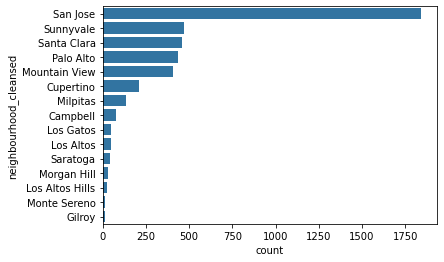

In [56]:
neighbourhood_order = listings_host_loc['neighbourhood_cleansed'].value_counts().index
ordered_neighbourhood = pd.api.types.CategoricalDtype(categories=neighbourhood_order, ordered=True)
listings_host_loc['neighbourhood_cleansed'] = \
    listings_host_loc['neighbourhood_cleansed'].astype(ordered_neighbourhood)
sb.countplot(data=listings_host_loc, y='neighbourhood_cleansed', color=base_color);

Again, the counts are highest for San Jose, and then this is followed by Sunnyvale, Santa Clara, Palo Alto, and Mountain View.

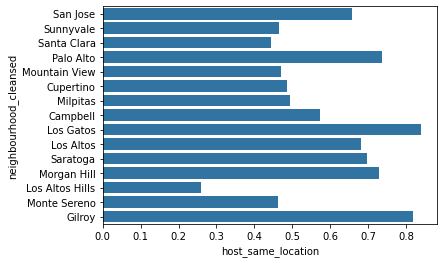

In [57]:
sb.barplot(data=listings_host_loc, x='host_same_location', y='neighbourhood_cleansed', color=base_color, ci=None);

Sunnyvale, Santa Clara, Mountain View, Cupertino, Milpitas, Los Altos Hills, and Monte Sereno all have lower than 50% of listings that have hosts in the same city. Los Alto Hills is particularly low, with only about 25% of listings with hosts in the same location. It is also interesting that many of these neighborhoods are towards the left side of the visualization, meaning that they have a higher number of listings. On the other end of the spectrum, Los Gatos and Gilroy both stand out as having high percentages of hosts in the same city.

Now I want to look at this same view by `room_type`.

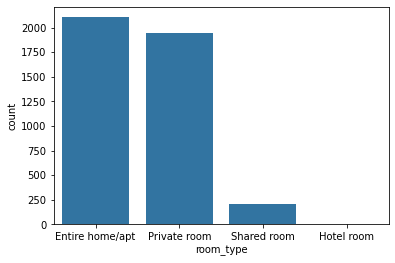

In [58]:
room_order = listings_host_loc['room_type'].value_counts().index
ordered_room = pd.api.types.CategoricalDtype(categories=room_order, ordered=True)
listings_host_loc['room_type'] = listings_host_loc['room_type'].astype(ordered_room)
sb.countplot(data=listings_host_loc, x='room_type', color=base_color);

In [59]:
listings_host_loc['room_type'].value_counts()

Entire home/apt    2104
Private room       1947
Shared room         203
Hotel room            2
Name: room_type, dtype: int64

As with before, the count of shared rooms is a lot lower than the two largest types. And again, I will remove the `Hotel room` type since that will not be useful.

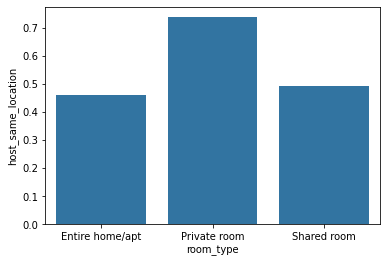

In [60]:
listings_host_loc_mod = listings_host_loc.query('room_type != "Hotel room"')
listings_host_loc_mod['room_type'].cat.remove_unused_categories(inplace=True)
sb.barplot(data=listings_host_loc_mod, x='room_type', y='host_same_location', color=base_color, ci=None);

Interestingly, private rooms have a much higher proportion of listings with hosts in the same city, but entire homes/apartments are about equal to shared rooms.

Finally, I will look at the distribution of `occupancy` faceted by `host_same_location`.

In [61]:
listings_host_loc['nights_per_year'] = run_sf_model(
    listings_host_loc['reviews_per_month'],
    listings_host_loc['minimum_nights']
)
listings_host_loc['occupancy'] = listings_host_loc['nights_per_year']/365

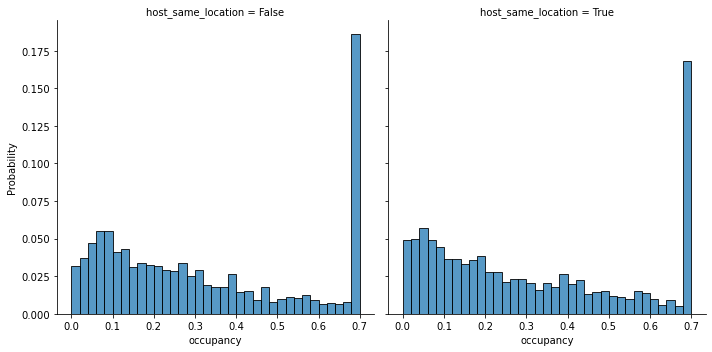

In [62]:
bin_size = 0.02
bins = np.arange(0, 0.7+bin_size, bin_size)
sb.displot(
    data=listings_host_loc,
    x='occupancy',
    col='host_same_location',
    bins=bins,
    stat='probability',
    common_norm=False
);

Listings with hosts in the same city seem to have slightly lower occupancy, as evidenced by the location of the peak on the left side of the distribution, along with the fact that the peak at 70% occupancy is slightly shorter. However, I do not think the difference is noticeable enough to make any meaningful conclusions.

### How many listings do hosts tend to have?

If a host has multiple listings, this is possibly an indication that the host is running their Airbnbs more like a hotel, rather than just sharing their primary residence.

First I want to see the distribution of `occupancy` faceted by hosts that have multiple listings, versus those that only have one. To do that, I will first create a boolean column that shows whether or not the listing is owned by someone who has multiple listings.

In [63]:
listings_occ['host_multi'] = listings_occ['calculated_host_listings_count']>1

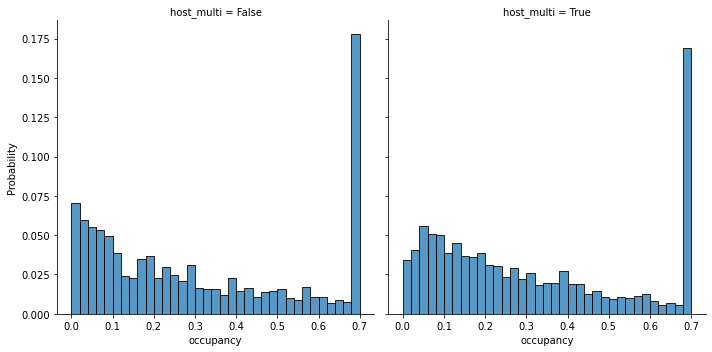

In [64]:
bin_size = 0.02
bins = np.arange(0, 0.7+bin_size, bin_size)
sb.displot(data=listings_occ, x='occupancy', col='host_multi', bins=bins, stat='probability', common_norm=False);

I do not think I can draw any meaningful conclusions from this visualizations. Properties owned by people with only one listing tend to have a higher proportion with lower `occupancy`, but also a higher proportion that hit the 70% cap.

Now I want to look at the distribution of hosts by the number of listings they have. The number of listings is located in the `calculated_host_listings_count` column; however, every row has this number for its respective host. To avoid counting hosts more than once, I will drop all rows with duplicate `host_id`. It does not matter which duplicates I drop, because every listing by a host has the same number in the `calculated_host_listings_count` column.

In [65]:
listings_unique_hosts = listings.drop_duplicates(subset='host_id')

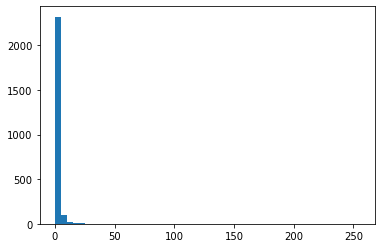

In [66]:
bin_size = 5
bins = np.arange(0, listings_unique_hosts['calculated_host_listings_count'].max()+bin_size, bin_size)
plt.hist(data=listings_unique_hosts, x='calculated_host_listings_count', bins=bins);

The data appears to be right-skewed; most hosts have less than five properties, but the distribution goes up to a maximum of around 250. I will use a logarithmic scale, which might make the data easier to interpret.

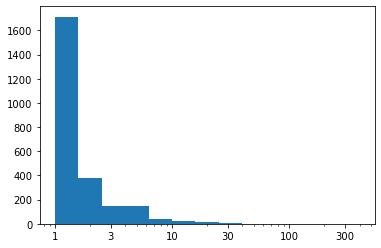

In [67]:
log_bin_size = 0.2
tick_labels = [1, 3, 10, 30, 100, 300]
upper_log_bound = np.log10(listings_unique_hosts['calculated_host_listings_count'].max())
bins = 10**np.arange(0, upper_log_bound+log_bin_size, log_bin_size)
plt.hist(data=listings_unique_hosts, x='calculated_host_listings_count', bins=bins)
plt.xscale('log')
plt.xticks(tick_labels, tick_labels);

This histogram makes it clear that the majority of hosts only have one listing, and there are very few that have more than 10. However, the right side of the distribution still is not easy to interpret, so I will look at the distribution one more time, this time only looking at hosts with multiple listings.

In [68]:
listings_unique_hosts_multi = listings_unique_hosts.query('calculated_host_listings_count > 1')

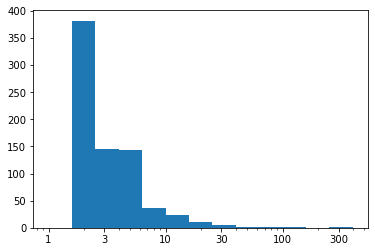

In [69]:
log_bin_size = 0.2
tick_labels = [1, 3, 10, 30, 100, 300]
upper_log_bound = np.log10(listings_unique_hosts_multi['calculated_host_listings_count'].max())
bins = 10**np.arange(0, upper_log_bound+log_bin_size, log_bin_size)
plt.hist(data=listings_unique_hosts_multi, x='calculated_host_listings_count', bins=bins)
plt.xscale('log')
plt.xticks(tick_labels, tick_labels);

This histogram shows a steep drop-off of hosts that have more than five listings. Furthermore, it is clear now that the highest amount of listings is somewhere around 300.

I also want to calculate below the proportion of hosts with more than one property.

In [70]:
listings_unique_hosts_multi.shape[0]/listings_unique_hosts.shape[0]

0.3052290231049858

I am curious to see who the hosts with the highest amount of listings are -- are they realtors, hotel owners, or something else? I will show the top 10 hosts below and their descriptions.

In [71]:
listings_unique_hosts.sort_values('calculated_host_listings_count', ascending=False, inplace=True)
listings_unique_hosts[['host_name', 'host_about', 'calculated_host_listings_count']].head(10)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,host_name,host_about,calculated_host_listings_count
991,Zeus,We built Zeus Living so you can feel at home w...,252
4578,Kia,NaN,141
2965,Jefferson,"I am a Fine art teacher, writer and Cameraman....",89
690,Tribe,"TRIBE is a travel lifestyle brand, here to bri...",73
39,Vic,where i've been...\nromantic hangout: paris\nm...,53
3086,Blueground,Why take a chance picking & choosing between s...,52
1326,Iz,I love creating affordable co-living spaces to...,37
612,Urban Flat,An Urban Flat is private furnished-apartment t...,34
1452,Bluebird,You’ve just found the best of both worlds. Blu...,30
151,Kathy,NaN,27


Interestingly, a lot of these do not seem to be individuals, but rather companies that own properties. This is evidenced by the `host_name`, some of which do not seem to be regular, everyday names, and also the `host_about`, where it is clearly stated in some cases that the host is a company. This seems to be very much against Airbnb's original intent for individuals to rent out their own spaces.

### What features best predict how many listings a host has?

Given the above evidence that there are some hosts are entire companies, I want to figure out which features are best to flag listings marketed by one of these multi-property owners. To do that, I will use a linear regression with `calculated_host_listings_count` as the response variable. First, I will need eliminate any columns that I believe will not be useful for the regression.

In [72]:
X = listings.drop([
    'id',
    'listing_url',
    'scrape_id',
    'last_scraped',
    'name',
    'description',
    'neighborhood_overview',
    'picture_url',
    'host_id',
    'host_url',
    'host_name',
    'host_about',
    'host_thumbnail_url',
    'host_picture_url',
    'host_neighbourhood',
    'host_listings_count',
    'host_total_listings_count',
    'neighbourhood',
    'property_type',
    'bathrooms_text',
    'has_availability',
    'calendar_last_scraped'
], axis=1)

In [73]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5185 entries, 0 to 5184
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   host_since                                    5185 non-null   datetime64[ns]
 1   host_location                                 5172 non-null   object        
 2   host_response_time                            4167 non-null   object        
 3   host_response_rate                            4167 non-null   float64       
 4   host_acceptance_rate                          4559 non-null   float64       
 5   host_is_superhost                             5185 non-null   bool          
 6   host_verifications                            5185 non-null   object        
 7   host_has_profile_pic                          5185 non-null   bool          
 8   host_identity_verified                        5185 non-null   bool  

Based on the above information, there is some cleaning I need to do before creating the model. Because Scikit-learn's linear regression does not allow any null values, I will need to take care of those. But first, I will create some additional features that I think might be useful for the regression. First, I will to find the length of each list in the columns `host_verifications` and `amenities`.

In [74]:
X['num_host_verifications'] = pd.Series([len(_list) for _list in listings['host_verifications']])
X['num_amenities'] = pd.Series([len(_list) for _list in listings['amenities']])

I also want to include the proportion of entire homes, private rooms, and shared rooms owned by the host. However, I do not want to include the absolute number, as this will obviously be correlated with the total number of listings. Therefore, I will drop the columns with listing counts after creating the columns with proportions.

In [75]:
listings_count = ['entire_homes', 'private_rooms', 'shared_rooms']
for col in listings_count:
    X['calculated_host_listings_prop_'+col] = \
        X['calculated_host_listings_count_'+col]/X['calculated_host_listings_count']
    X.drop('calculated_host_listings_count_'+col, axis=1, inplace=True)
X.drop('calculated_host_listings_count', axis=1, inplace=True)

I will also change all columns with the datetime data type to integers. However, the `first_review` and `last_review` columns contain some null dates, likely because these listings have not received reviews yet. In order to indicate that these first and last reviews will occur in the future, I will use the date that is one day after the listings were `last_scraped`, on 10/25/20.

In [76]:
X_datetime = X.select_dtypes(include=['datetime64[ns]']).columns
# use one day after listings listings were last_scraped as the future_date
future_date = pd.to_datetime(listings['last_scraped'].unique()[0]).toordinal()+1
for col in X_datetime:
    X[col] = X[col].apply(lambda date: date.toordinal() if pd.notnull(date) else future_date)

I also want a column that describes whether hosts are in the same city as their listings. I will create a function similar to the one I used previously, but this one will have `try` and `except` blocks since there are some NaN values that do not allow me to use the same lambda function as before.

In [77]:
def extract_city(location_string):
    '''
    INPUT:
    location_string (str) - location name; can be city, state, and country separated by commas
    
    OUTPUT:
    location_cleansed (str) - only the city name, if noted
    
    Split a location name by commas and take the first element of the result to get the city name, if noted.
    '''
    
    try:
        location_cleansed = location_string.split(',')[0]
    except:
        location_cleansed = False
    return location_cleansed

In [78]:
X['location_cleansed'] = X['host_location'].apply(extract_city)
X['host_same_location'] = X['location_cleansed']==X['neighbourhood_cleansed']
X.drop(['host_location', 'location_cleansed'], axis=1, inplace=True)

Now I want to create a column for every single unique value in `host_verifications` and `amenities`, and these columns will describe whether the list in those columns contains a given value. In order to do this, I will first need a way to find every single unique value in those lists. This will be done with a function that generates a series containing every value in every list.

In [79]:
def transform_to_1D(series):
    '''
    INPUT:
    series (Series) - column with lists
    
    OUTPUT:
    all_values (Series) - every value from every list in the original column
    
    Convert a Pandas series with lists into a single Pandas series with every value.
    '''
    
    all_values = pd.Series([x for _list in series for x in _list])
    return all_values

Using the above function, I can now create another function that converts each unique value in those columns with lists into its own column.

In [80]:
def create_bool_from_list(df, list_col):
    '''
    INPUT:
    df (DataFrame) - dataframe containing the column of interest
    list_col (str) - column with lists
    
    OUTPUT:
    None
    
    For each unique value in a column with lists,
    create a new boolean column to denote whether a row's list contains that value,
    then drop the column with lists.
    '''
    
    for value in transform_to_1D(df[list_col]).value_counts().index:
        df[list_col+'_'+value] = df[list_col].apply(lambda _list: value in _list)
    df.drop(list_col, axis=1, inplace=True)

In [81]:
create_bool_from_list(X, 'host_verifications')
create_bool_from_list(X, 'amenities')

Now I will plots the distributions of numeric columns with missing values to determine how I should deal with those missing values.

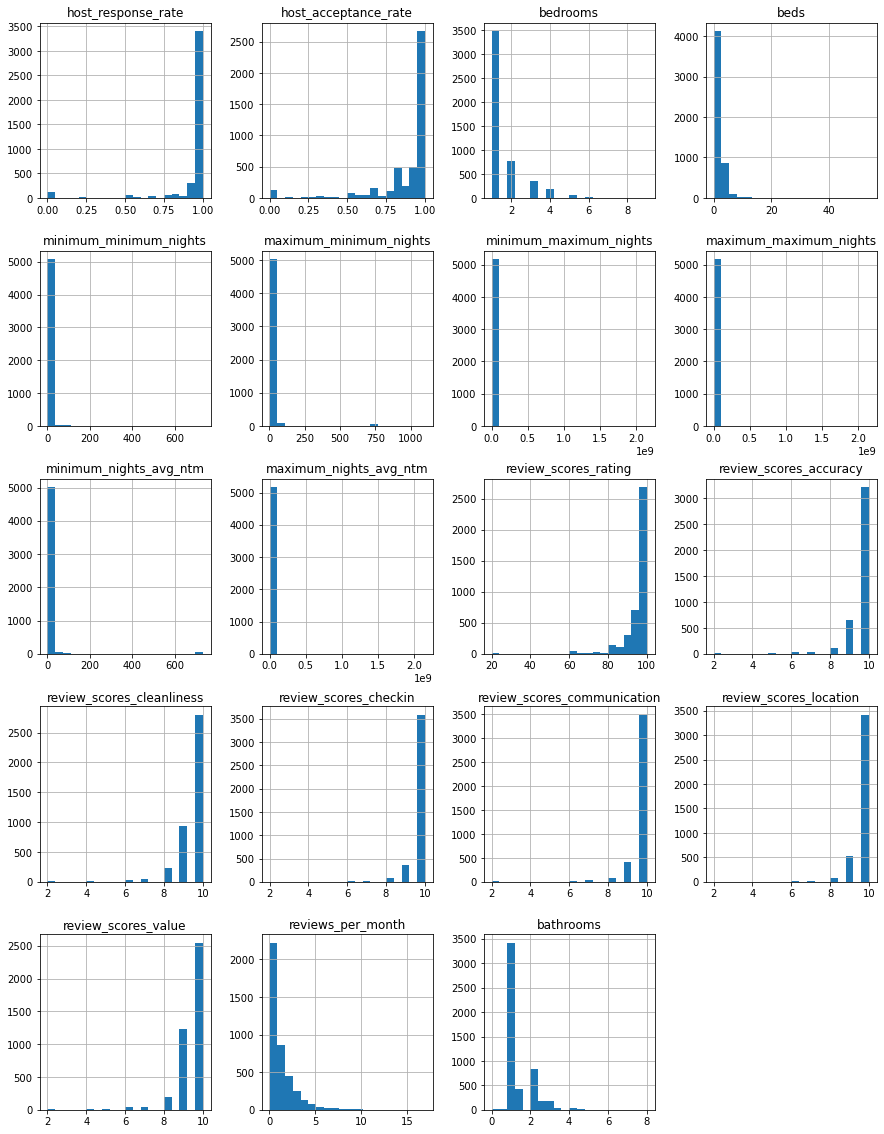

In [82]:
X_null_num = X.columns[X.isnull().sum()>0]
X_null_num = list(X[X_null_num].select_dtypes(exclude=['object']).columns)
X[X_null_num].hist(bins=20, figsize=(15,20));

For the `reviews_per_month` column, if there is a missing value, that likely means that the listing just has not received any reviews. Therefore, I will impute those with 0. Otherwise, since the rest of these columns are skewed to the left or right and have outliers, I will impute values using each column's median.

In [83]:
# do not impute reviews_per_month with 0
X_null_num.remove('reviews_per_month')
X['reviews_per_month'].fillna(0, inplace=True)

In [84]:
for col in X_null_num:
    X[col].fillna(X[col].median(), inplace=True)

For the categorical variables, I will create dummy columns. If the original column has missing values, I will also create an additional column that denotes whether the value was missing.

In [85]:
X_cat = list(X.select_dtypes(include=['object']).columns)
for col in X_cat:
    if X[col].isnull().sum() == 0:
        X = pd.concat([X, pd.get_dummies(X[col], prefix=col, drop_first=True)], axis=1)
    else:
        X = pd.concat([X, pd.get_dummies(X[col], prefix=col, drop_first=True, dummy_na=True)], axis=1)
    X.drop(col, axis=1, inplace=True)

My explanatory variables should now be ready to use in the linear regression. I will do one last check to find out how many features I have now and whether there are any more missing values.

In [86]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5185 entries, 0 to 5184
Columns: 298 entries, host_since to bathrooms_type_nan
dtypes: bool(234), float64(25), int64(15), uint8(24)
memory usage: 2.9 MB


In [87]:
X.isnull().sum().sum()

0

Now I can use `calculated_host_listings_count` as the response variable and run the linear regression. In this model, I will test several thresholds; if the sum of a column is greater than the threshold, then I will keep the column. This means that the lower the threshold, the more features there will be. This will help ensure that I am testing different numbers of features for the highest possible r-squared value, and also getting rid of any variables that are only applicable to a few listings and do not have much variability.

In [88]:
y = listings['calculated_host_listings_count']

In [89]:
thresholds = [25, 50, 250, 500, 1250, 2500]
r2_score_test_best = 0
for threshold in thresholds:
    # reduce the features down to those that have a sum higher than the threshold
    X_reduced = X.iloc[:, np.where((X.sum()>threshold) == True)[0]]
    X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)
    price_model = LinearRegression(normalize=True)
    price_model.fit(X_train, y_train)
    y_train_preds = price_model.predict(X_train)
    y_test_preds = price_model.predict(X_test)
    r2_score_test = r2_score(y_test, y_test_preds)
    # store data on the model that has the highest r-squared score on the test data
    if r2_score_test > r2_score_test_best:
        price_model_best = price_model
        r2_score_test_best = r2_score_test
        r2_score_train_best = r2_score(y_train, y_train_preds)
        X_train_best = X_train
        X_test_best = X_test
        y_train_best = y_train
        y_test_best = y_test
        threshold_best = threshold
r2_score_train_best, r2_score_test_best

(0.7419258347602204, 0.7491349488483019)

The r-squared score for the training and test data are both high, which is good and indicates that there is not overfitting on one set or the other. I will now take a look at the top 20 features, and since I normalized the regression, the absolute values of the coefficients determine their importance in the model.

In [90]:
coefs = pd.DataFrame()
coefs['var'] = X_train_best.columns
coefs['coefs'] = price_model_best.coef_
coefs['abs_coefs'] = np.abs(price_model_best.coef_)
coefs = coefs.sort_values('abs_coefs', ascending=False)
coefs = coefs.reset_index(drop=True)
coefs.head(20)

,var,coefs,abs_coefs
0,amenities_Cooking basics,-36.000491,36.000491
1,host_verifications_work_email,29.333173,29.333173
2,host_response_time_nan,-22.617490,22.617490
3,host_verifications_government_id,22.563410,22.563410
4,host_response_rate,22.325974,22.325974
5,host_response_time_within a day,-20.567680,20.567680
6,amenities_Free street parking,-18.585328,18.585328
7,amenities_Extra pillows and blankets,17.627569,17.627569
8,amenities_Stove,16.172492,16.172492
9,calculated_host_listings_prop_entire_homes,-15.159956,15.159956


It looks like the types of amenities a listing has, the types of verifications the host has, the response time and rate of the host, and the proportion of entire homes/apartments and private rooms owned by the host are all important features in determining how many properties a listing's host has.

<a id='results'></a>
## Results

### How often are Airbnb listings occupied?

Using Inside Airbnb's San Francisco Model, the distribution for Airbnb occupancy hits a peak at around 5% and then gradually decreases until it reaches the maximum of 70%, at which point the number of listings shoots up. In fact, about 17% of all operating Airbnbs are at this maximum. This is likely due to the model being capped at 70%, so any listings that might have had higher occupancy were still adjusted down to make the model reasonable and conservative. Additionally, the occupancy distribution differs between various room types. Entire homes/apartments have the highest occupancy, followed by private rooms and then shared rooms.

### Do Airbnbs generate more income per month than long-term rentals?

Among all listings, the median Airbnb income per month is lower than the median Santa Clara County monthly long-term rent of $2,392. However, if the listings are narrowed down to those that are booked for at least one-third of the year, the median Airbnb income per month for entire homes/apartments becomes about equivalent to the median long-term rent. This threshold of one-third of the year is not unreasonably difficult to attain, given that around 40% of listings are able to. Of course, the number of people that a property accommodates also matters -- for entire homes/apartments, only those that accommodate at least four people and reach the one-third year threshold have a median higher than the median long-term rent.

### What percentage of listings have a host that lives in a different city than the listing location?

After narrowing down the dataset to records that have definitive host and property locations, I found that about 41% of listings have a host that lives in a different city than the listing location. Interestingly, many of the cities with higher amounts of Airbnb properties also have lower percentages of listings with hosts in the same city.

### How many listings do hosts tend to have?

About 31% of hosts have more than one listing and for those that have multiple, most have less than five. However, the maximum number of listings for a single host is 252, and many of the top property owners seem to be companies rather than individuals.

### What features best predict how many listings a host has?

The types of amenities a listing has, the types of verifications the host has, the response time and rate of the host, and the proportion of entire homes/apartments and private rooms owned by the host best predict the number of properties a listing's host has.

### Explanatory Data Visualizations

I will now clean up some of the exploratory visualizations from above so that they can be deployed as explanatory visualizations.

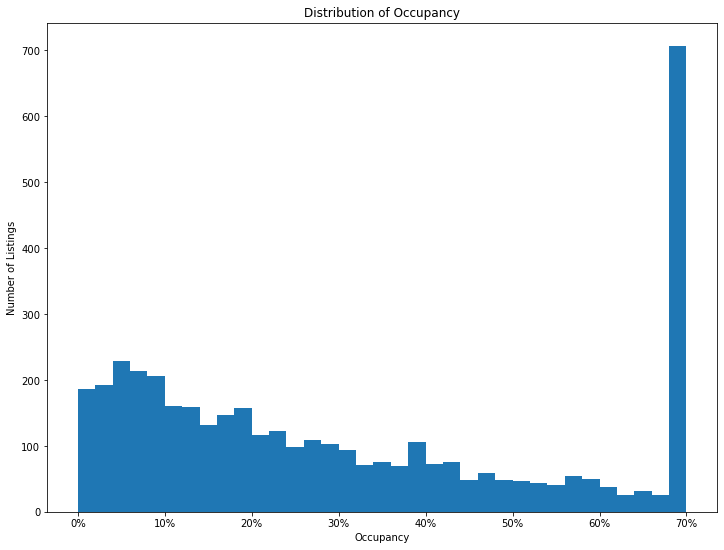

In [91]:
plt.figure(figsize=[12, 9])
bin_size = 0.02
bins = np.arange(0, 0.7+bin_size, bin_size)
tick_locs = np.arange(0, 0.8, 0.1)
tick_labels = ['{:.0f}%'.format(v) for v in tick_locs*100]
plt.hist(data=listings_occ, x='occupancy', bins=bins)
plt.title('Distribution of Occupancy')
plt.xlabel('Occupancy')
plt.ylabel('Number of Listings')
plt.xticks(tick_locs, tick_labels);

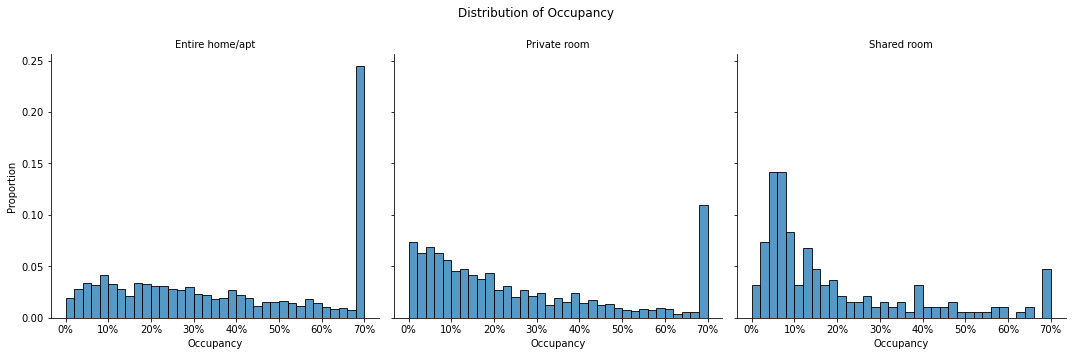

In [92]:
bin_size = 0.02
bins = np.arange(0, 0.7+bin_size, bin_size)
tick_locs = np.arange(0, 0.8, 0.1)
tick_labels = ['{:.0f}%'.format(v) for v in tick_locs*100]
g = sb.displot(
    data=listings_occ_mod,
    x='occupancy',
    col='room_type',
    bins=bins,
    stat='probability',
    common_norm=False
)
plt.subplots_adjust(top=0.85)
plt.suptitle('Distribution of Occupancy')
g.set_titles('{col_name}')
g.set_axis_labels('Occupancy', 'Proportion')
g.set(xticks=tick_locs, xticklabels=tick_labels);

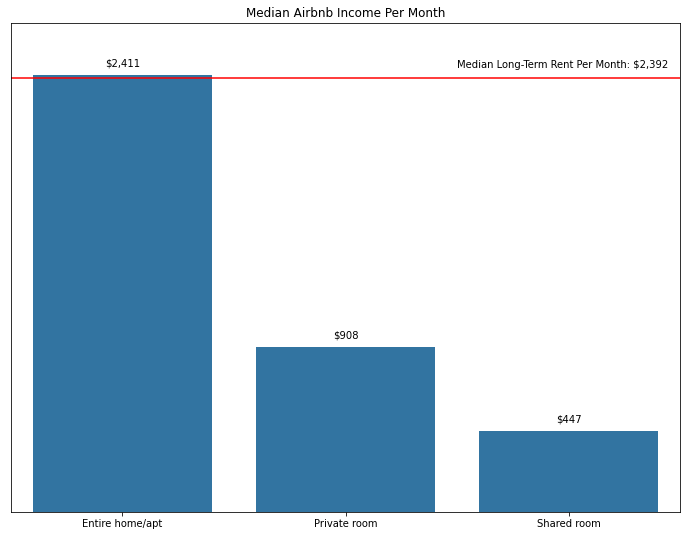

In [93]:
plt.figure(figsize=[12, 9])
sb.barplot(
    data=listings_occ_higher,
    x='room_type',
    y='income_per_month',
    estimator=np.median,
    color=base_color,
    ci=None
)
plt.axhline(y=median_rent, color='r')
plt.title('Median Airbnb Income Per Month')
plt.xlabel('')
plt.ylabel('')
medians = listings_occ_higher.groupby(['room_type'])['income_per_month'].median()
locs, labels = plt.xticks()
for loc, label in zip(locs, labels):
    median = medians[label.get_text()]
    median_label = '${:,.0f}'.format(median)
    plt.text(loc, median+50, median_label, ha='center')
plt.ylim(0, 2700)
plt.yticks([])
plt.text(1.5, 2450, 'Median Long-Term Rent Per Month: ${:,.0f}'.format(median_rent));

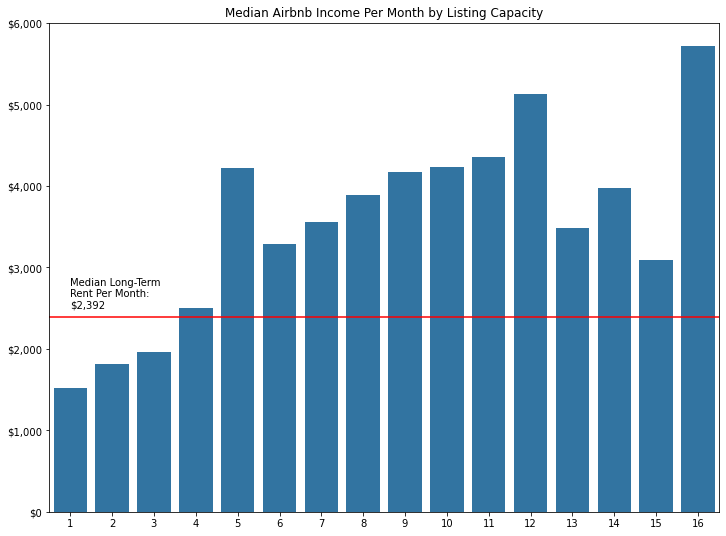

In [94]:
plt.figure(figsize=[12, 9])
tick_locs = np.arange(0, 7000, 1000)
tick_labels = ['${:,.0f}'.format(v) for v in tick_locs]
sb.barplot(
    data=listings_occ_entire_high,
    x='accommodates',
    y='income_per_month',
    estimator=np.median,
    color=base_color,
    ci=None
)
plt.axhline(y=median_rent, color='r')
plt.title('Median Airbnb Income Per Month by Listing Capacity')
plt.xlabel('')
plt.ylabel('')
plt.yticks(tick_locs, tick_labels)
plt.text(0, 2500, 'Median Long-Term\nRent Per Month:\n${:,.0f}'.format(median_rent));

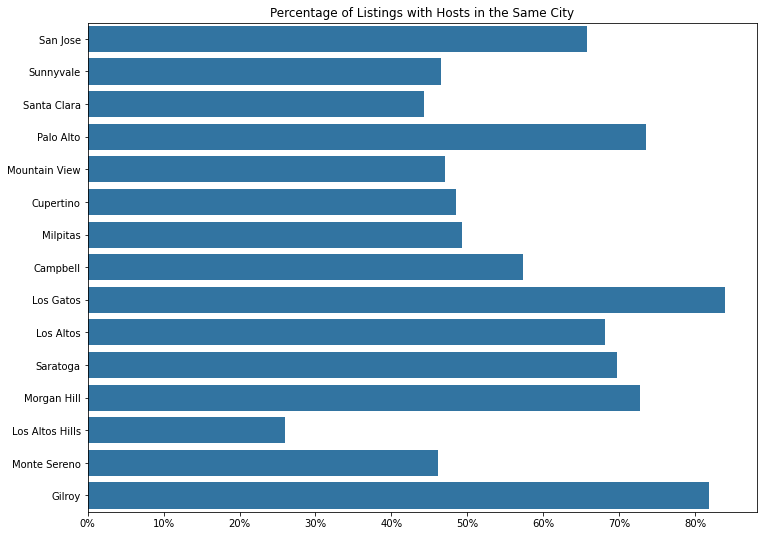

In [95]:
plt.figure(figsize=[12, 9])
tick_locs = np.arange(0, 0.9, 0.1)
tick_labels = ['{:.0f}%'.format(v) for v in tick_locs*100]
sb.barplot(data=listings_host_loc, x='host_same_location', y='neighbourhood_cleansed', color=base_color, ci=None)
plt.title('Percentage of Listings with Hosts in the Same City')
plt.xlabel('')
plt.xticks(tick_locs, tick_labels)
plt.ylabel('');

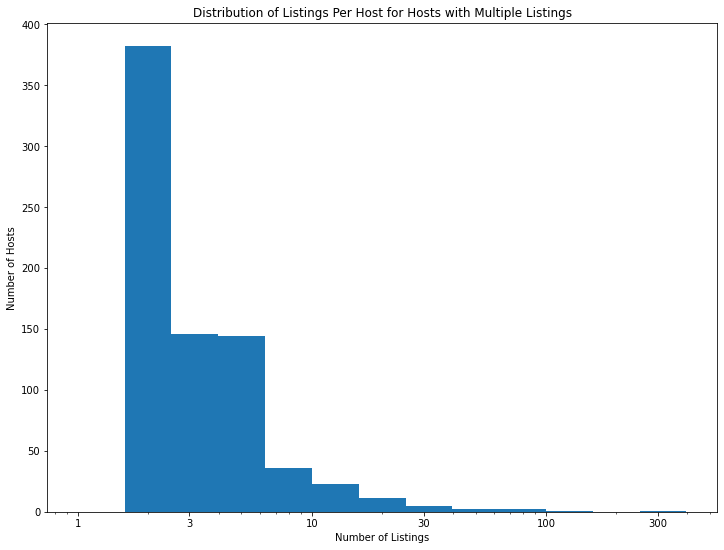

In [96]:
plt.figure(figsize=[12, 9])
log_bin_size = 0.2
tick_labels = [1, 3, 10, 30, 100, 300]
upper_log_bound = np.log10(listings_unique_hosts_multi['calculated_host_listings_count'].max())
bins = 10**np.arange(0, upper_log_bound+log_bin_size, log_bin_size)
plt.hist(data=listings_unique_hosts_multi, x='calculated_host_listings_count', bins=bins)
plt.title('Distribution of Listings Per Host for Hosts with Multiple Listings')
plt.xscale('log')
plt.xticks(tick_labels, tick_labels)
plt.xlabel('Number of Listings')
plt.ylabel('Number of Hosts');

<a id='deploy'></a>
## Deploy

The Medium blog post summarizing this investigation can be found [here](https://evanchen13.medium.com/this-is-how-airbnb-is-contributing-to-the-bay-area-housing-crisis-3d5bfd6c8ed2).

<a id='sources'></a>
## Sources

- [Check if string matches a pattern](https://stackoverflow.com/questions/12595051/check-if-string-matches-pattern)
- [Lists in Pandas dataframes](https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173)
- [Strftime](https://strftime.org/)
- [Convert dates to integers](https://stackoverflow.com/questions/51044411/how-do-you-manage-missing-date-in-a-dataframe)
- [Inside Airbnb](http://insideairbnb.com/about.html)
- [Inside Airbnb - Santa Clara County](http://insideairbnb.com/santa-clara-county/#)
- [Santa Clara County Rent Statistics](https://www.deptofnumbers.com/rent/california/santa-clara-county/)
- [Remove unused categories](https://stackoverflow.com/questions/62090972/why-does-pandas-value-counts-show-a-count-of-zero-for-some-values)
- [About Airbnb](https://news.airbnb.com/about-us/)
- [Airbnbs vs. hotels](https://www.investopedia.com/articles/investing/112414/airbnb-brings-sharing-economy-hotels.asp)